In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Data Skimming
def data_skimming(df):
    skimmed_data = pd.DataFrame({
        'feature': df.columns.values,
        'data_type': df.dtypes.values,
        'null_value(%)': df.isna().mean().values * 100,
        'neg_value(%)': [len(df[df[col] < 0]) / len(df) * 100 if df[col].dtype in [np.float64, np.int64] else 0 for col in df.columns],
        '0_value(%)': [len(df[df[col] == 0]) / len(df) * 100 if df[col].dtype in [np.float64, np.int64] else 0 for col in df.columns],
        'duplicate': df.duplicated().sum(),
        'n_unique': df.nunique().values,
        'sample_unique': [df[col].dropna().unique()[:5] for col in df.columns]  # Limited to 5 unique values for better visibility
    })
    
    return skimmed_data.round(3)

In [3]:
df = pd.read_excel("E Commerce Datasets.xlsx")

In [4]:
df.info()
data_skimming(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,CustomerID,int64,0.000,0.0,0.000,0,5630,"[50001, 50002, 50003, 50004, 50005]"
1,Churn,int64,0.000,0.0,83.162,0,2,"[1, 0]"
2,Tenure,float64,4.689,0.0,9.023,0,36,"[4.0, 0.0, 13.0, 11.0, 9.0]"
3,PreferredLoginDevice,object,0.000,0.0,0.000,0,3,"[Mobile Phone, Phone, Computer]"
4,CityTier,int64,0.000,0.0,0.000,0,3,"[3, 1, 2]"
5,WarehouseToHome,float64,4.458,0.0,0.000,0,34,"[6.0, 8.0, 30.0, 15.0, 12.0]"
6,PreferredPaymentMode,object,0.000,0.0,0.000,0,7,"[Debit Card, UPI, CC, Cash on Delivery, E wallet]"
7,Gender,object,0.000,0.0,0.000,0,2,"[Female, Male]"
8,HourSpendOnApp,float64,4.529,0.0,0.053,0,6,"[3.0, 2.0, 1.0, 0.0, 4.0]"
9,NumberOfDeviceRegistered,int64,0.000,0.0,0.000,0,6,"[3, 4, 5, 2, 1]"


**Description of Features**

| Features                    | Description                                                                                                         |
|-----------------------------|---------------------------------------------------------------------------------------------------------------------|
| `CustomerID`                | Unique customer ID                                                                                                  |
| `Churn`                     | Churn Flag                                                                                                          |
| `Tenure`                    | Tenure of customer in organization                                                                                  |
| `PreferredLoginDevice`      | Preferred login device of customer                                                                                  |
| `CityTier`                  | City tier                                                                                                           |
| `WarehouseToHome`           | Distance between warehouse and home of customer                                                                     |
| `PreferredPaymentMode`      | Preferred payment method of customer                                                                                |
| `Gender`                    | Gender of customer                                                                                                  |
| `HourSpendOnApp`            | Number of hours spent on mobile application or website                                                              |
| `NumberOfDeviceRegistered`  | Total number of devices registered to a particular customer                                                         |
| `PreferedOrderCat`          | Preferred order category of customer in last month                                                                  |
| `SatisfactionScore`         | Satisfactory score of customer on service                                                                           |
| `MaritalStatus`             | Marital status of customer                                                                                          |
| `NumberOfAddress`           | Total number of addresses added for a particular customer                                                           |
| `Complain`                  | Any complaint raised in the last month                                                                              |
| `OrderAmountHikeFromlastYear` | Percentage increase in order amount from last year                                                                |
| `CouponUsed`                | Total number of coupons used in the last month                                                                      |
| `OrderCount`                | Total number of orders placed in the last month                                                                     |
| `DaySinceLastOrder`         | Days since last order by customer                                                                                   |
| `CashbackAmount`            | Average cashback in the last month                                                                                  |

From the data skimming, we can see that there are several missing value in the datasets, eventhough the number is not significant ( 4% to 5% ), i decided to explore more regarding the data

In [5]:
# Shows the missing value rows
df[df.isnull().any(axis=1)]

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5610,55611,0,9.0,Mobile Phone,2,33.0,Debit Card,Female,3.0,4,Fashion,1,Single,3,1,17.0,2.0,2.0,NaN,213.37
5621,55622,1,14.0,Mobile Phone,3,35.0,E wallet,Male,3.0,5,Fashion,5,Married,6,1,14.0,3.0,NaN,1.0,233.54
5622,55623,0,13.0,Mobile Phone,3,31.0,E wallet,Female,3.0,5,Grocery,1,Married,2,0,12.0,4.0,NaN,7.0,245.31
5623,55624,0,5.0,Computer,1,12.0,Credit Card,Male,4.0,4,Laptop & Accessory,5,Single,2,0,20.0,2.0,2.0,NaN,224.36


In [6]:
# Investigate pattern of missingness
missing_values_count =  df.isnull().sum()
print(missing_values_count)

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


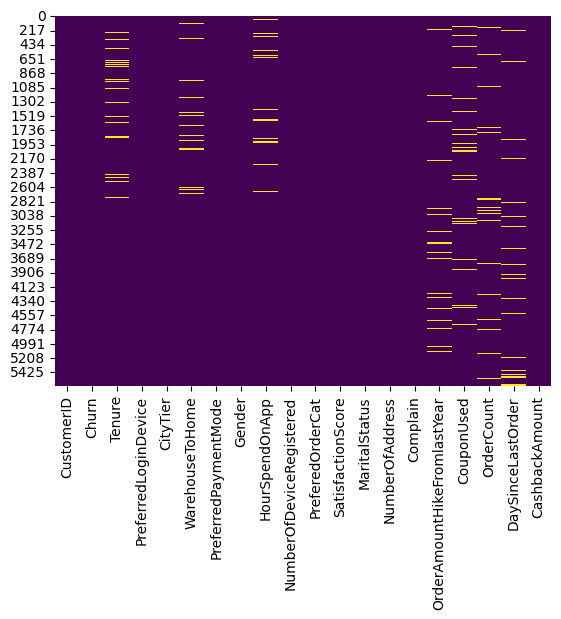

In [7]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [8]:
# Create a column indicating missing values in 'Tenure'
df['Tenure_missing'] = df['Tenure'].isnull().astype(int)

# Select only numeric columns for correlation calculation
numeric_cols = df.select_dtypes(include=['number'])

# Compute correlations
correlations = numeric_cols.corr()['Tenure_missing'].sort_values(ascending=False)
print(correlations)

Tenure_missing                 1.000000
Churn                          0.082056
SatisfactionScore              0.027620
Complain                      -0.007844
WarehouseToHome               -0.029954
OrderAmountHikeFromlastYear   -0.034911
CityTier                      -0.055849
NumberOfDeviceRegistered      -0.094277
NumberOfAddress               -0.094480
OrderCount                    -0.121906
CouponUsed                    -0.129647
HourSpendOnApp                -0.146600
DaySinceLastOrder             -0.157114
CustomerID                    -0.196892
CashbackAmount                -0.255825
Tenure                              NaN
Name: Tenure_missing, dtype: float64


The correlations are generally weak, suggesting that missing Tenure values might not be strongly related to any single feature. <br>

In [9]:
# Drop all columns with any missing values
df_cleaned = df.dropna()

In [10]:
df_cleaned

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_missing
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,...,2,Single,9,1,11.0,1.0,1.0,5.0,159.93,0
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,...,5,Single,8,0,23.0,0.0,1.0,3.0,134.07,0
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,...,5,Single,2,1,22.0,4.0,6.0,7.0,139.19,0
11,50012,1,11.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,...,3,Single,10,1,13.0,0.0,1.0,0.0,153.81,0
12,50013,1,0.0,Phone,1,11.0,COD,Male,2.0,3,...,3,Single,2,1,13.0,2.0,2.0,2.0,134.41,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,55625,0,1.0,Mobile Phone,3,12.0,UPI,Female,2.0,5,...,3,Single,2,0,19.0,2.0,2.0,1.0,154.66,0
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,...,1,Married,6,0,18.0,1.0,2.0,4.0,150.71,0
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,...,4,Married,3,1,21.0,1.0,2.0,4.0,186.42,0
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,...,4,Married,4,0,15.0,2.0,2.0,9.0,178.90,0


In [11]:
data_skimming(df_cleaned)

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,CustomerID,int64,0.0,0.0,0.000,0,3774,"[50001, 50004, 50006, 50012, 50013]"
1,Churn,int64,0.0,0.0,83.280,0,2,"[1, 0]"
2,Tenure,float64,0.0,0.0,8.029,0,34,"[4.0, 0.0, 11.0, 9.0, 19.0]"
3,PreferredLoginDevice,object,0.0,0.0,0.000,0,3,"[Mobile Phone, Phone, Computer]"
4,CityTier,int64,0.0,0.0,0.000,0,3,"[3, 1, 2]"
5,WarehouseToHome,float64,0.0,0.0,0.000,0,34,"[6.0, 15.0, 22.0, 11.0, 13.0]"
6,PreferredPaymentMode,object,0.0,0.0,0.000,0,7,"[Debit Card, COD, CC, Credit Card, E wallet]"
7,Gender,object,0.0,0.0,0.000,0,2,"[Female, Male]"
8,HourSpendOnApp,float64,0.0,0.0,0.026,0,6,"[3.0, 2.0, 1.0, 4.0, 0.0]"
9,NumberOfDeviceRegistered,int64,0.0,0.0,0.000,0,6,"[3, 4, 5, 2, 1]"


In [12]:
df_cleaned

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_missing
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,...,2,Single,9,1,11.0,1.0,1.0,5.0,159.93,0
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,...,5,Single,8,0,23.0,0.0,1.0,3.0,134.07,0
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,...,5,Single,2,1,22.0,4.0,6.0,7.0,139.19,0
11,50012,1,11.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,...,3,Single,10,1,13.0,0.0,1.0,0.0,153.81,0
12,50013,1,0.0,Phone,1,11.0,COD,Male,2.0,3,...,3,Single,2,1,13.0,2.0,2.0,2.0,134.41,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,55625,0,1.0,Mobile Phone,3,12.0,UPI,Female,2.0,5,...,3,Single,2,0,19.0,2.0,2.0,1.0,154.66,0
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,...,1,Married,6,0,18.0,1.0,2.0,4.0,150.71,0
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,...,4,Married,3,1,21.0,1.0,2.0,4.0,186.42,0
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,...,4,Married,4,0,15.0,2.0,2.0,9.0,178.90,0


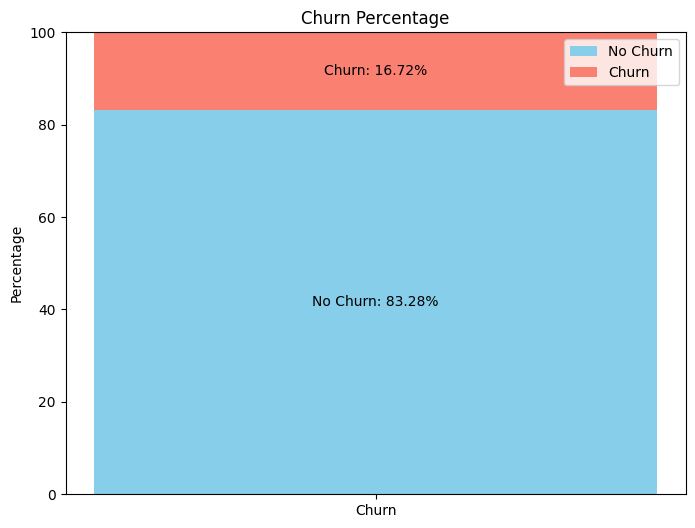

In [13]:
# Calculate churn percentages
churn_counts = df_cleaned['Churn'].value_counts(normalize=True) * 100
churn_labels = ['No Churn', 'Churn']

# Plot the churn percentages as a single stacked bar
plt.figure(figsize=(8, 6))
plt.bar(['Churn'], [churn_counts[0]], label='No Churn', color='skyblue')
plt.bar(['Churn'], [churn_counts[1]], bottom=[churn_counts[0]], label='Churn', color='salmon')

# Add annotations
for i, (label, percentage) in enumerate(zip(churn_labels, churn_counts)):
    plt.text(0, churn_counts.cumsum()[i] - percentage / 2, f'{label}: {percentage:.2f}%', ha='center', va='center', color='black')

# Customize the plot
plt.title('Churn Percentage')
plt.ylabel('Percentage')
plt.ylim(0, 100)  # Set y-axis limits to 0-100 for percentage
plt.legend(loc='upper right')
plt.show()

Churn Rate: With 16.72% of customers leaving, this represents a notable portion of the customer base. Although most customers stay, this churn could affect revenue and growth if not managed. <br>
next we'll deep dive on looking at churn by each category such as :
1. City Tier
2. Gender and Marital status
3. Customer Tenure
4. Prefered Login device
5. How much hours spent on app
6. Number of device registered
7. Preffered payment method

etc.

In [14]:
# Calculate churn and non-churn rate for each city tier
churn_data = df_cleaned.groupby('CityTier')['Churn'].value_counts(normalize=True).unstack() * 100
churn_data.columns = ['Not Churned', 'Churned']

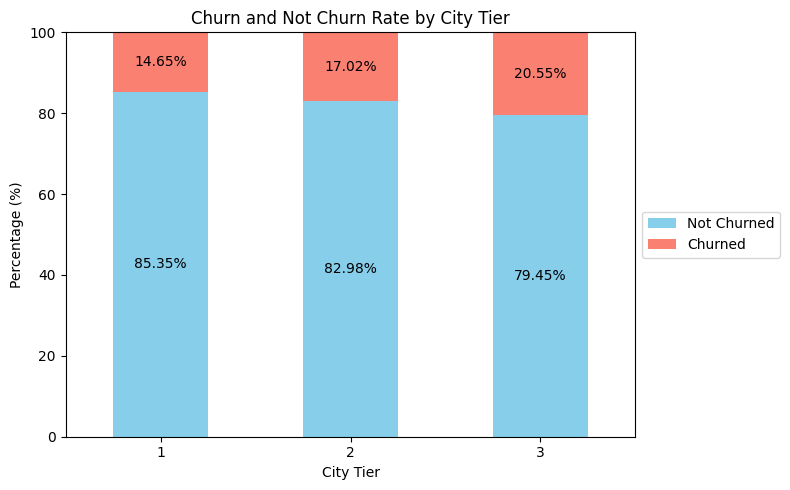

In [15]:
# Plot the churn and not churn rate by city tier
ax = churn_data.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(8, 5))
plt.title('Churn and Not Churn Rate by City Tier')
plt.xlabel('City Tier')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)

# Add annotations
for index, (not_churned, churned) in enumerate(zip(churn_data['Not Churned'], churn_data['Churned'])):
    plt.text(index, not_churned / 2, f'{not_churned:.2f}%', ha='center', va='center', color='black')
    plt.text(index, not_churned + churned / 2, f'{churned:.2f}%', ha='center', va='center', color='black')

plt.xticks(rotation=0)

# Place legend outside of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

## Insight on Churn and Not Churn Rate by City Tier

The bar chart above illustrates the churn and not churn rates across three city tiers. Here are some key insights:

1. **City Tier 1**:
   - **Not Churned**: 85.35%
   - **Churned**: 14.65%
   - Insight: City Tier 1 has the lowest churn rate, indicating higher customer retention compared to the other tiers.

2. **City Tier 2**:
   - **Not Churned**: 82.98%
   - **Churned**: 17.02%
   - Insight: City Tier 2 shows a slightly higher churn rate than Tier 1, suggesting a moderate level of customer retention.

3. **City Tier 3**:
   - **Not Churned**: 79.45%
   - **Churned**: 20.55%
   - Insight: City Tier 3 has the highest churn rate, indicating the lowest customer retention among the tiers.

### Overall Analysis

- **Trend**: As the city tier increases from 1 to 3, the churn rate increases, and the not churned rate decreases.
- **Implications**: Businesses may need to focus more on customer retention strategies in higher-tier cities (Tier 3) to reduce churn.

In [16]:
# Filter for Tier 3 customers
tier3_data = df_cleaned[df_cleaned['CityTier'] == 3]

# Calculate churn rate for Tier 3
tier3_churn_rate = tier3_data['Churn'].mean()
print(f"Churn rate for Tier 3: {tier3_churn_rate:.2%}")

Churn rate for Tier 3: 20.55%


In [17]:
# Select only numeric columns for correlation analysis
numeric_columns = tier3_data.select_dtypes(include=['float64', 'int64'])

# Check correlations with churn
correlation_matrix = numeric_columns.corr()
print(correlation_matrix['Churn'].sort_values(ascending=False))

Churn                          1.000000
Complain                       0.246121
NumberOfDeviceRegistered       0.144185
NumberOfAddress                0.142526
WarehouseToHome                0.120952
SatisfactionScore              0.088556
HourSpendOnApp                 0.030851
CustomerID                     0.021355
OrderAmountHikeFromlastYear   -0.000060
OrderCount                    -0.014668
CashbackAmount                -0.035312
CouponUsed                    -0.040279
DaySinceLastOrder             -0.159090
Tenure                        -0.343311
CityTier                            NaN
Name: Churn, dtype: float64


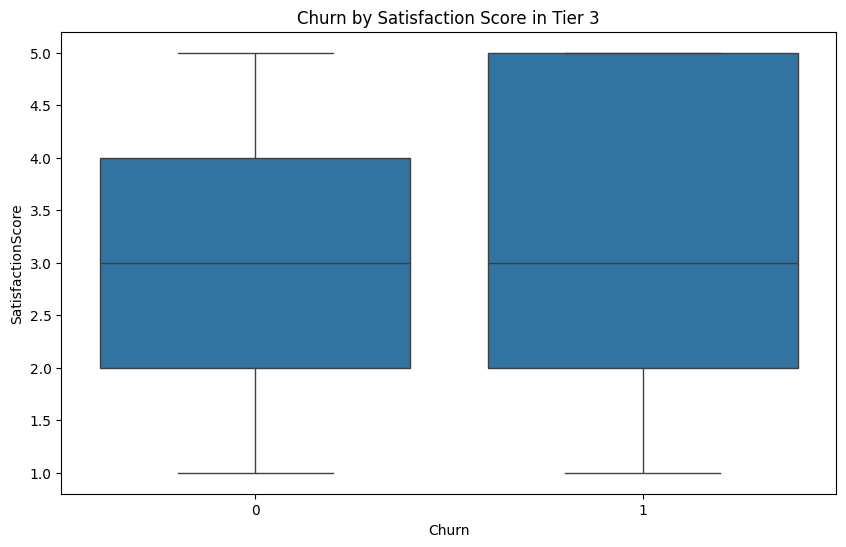

In [18]:
# Churn by satisfaction score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='SatisfactionScore', data=tier3_data)
plt.title('Churn by Satisfaction Score in Tier 3')
plt.show()

### Churn by Satisfaction Score
- **Observation**: The boxplot indicates that customers who churn tend to have a slightly lower median satisfaction score compared to those who don't churn.
- **Implication**: Improving customer satisfaction could help reduce churn.

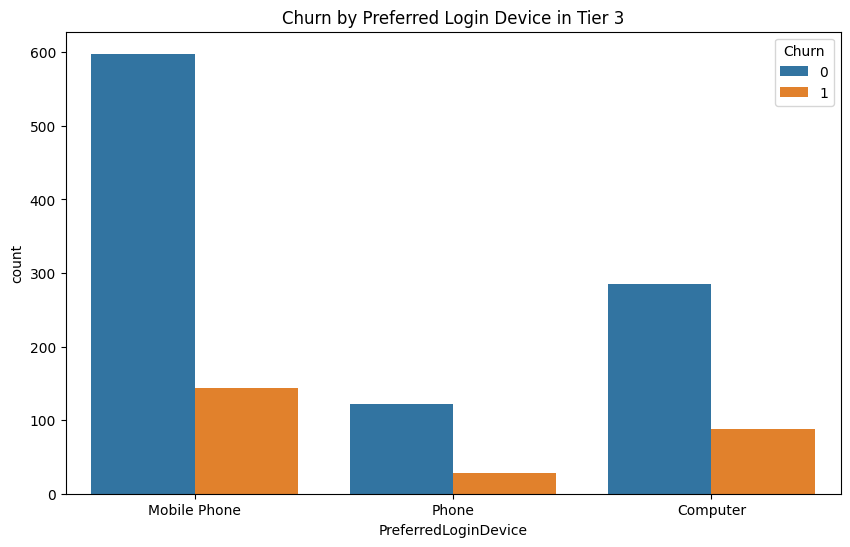

In [19]:
# Churn by Preferred Login Device
plt.figure(figsize=(10, 6))
sns.countplot(x='PreferredLoginDevice', hue='Churn', data=tier3_data)
plt.title('Churn by Preferred Login Device in Tier 3')
plt.show()

### Churn by Preferred Login Device
- **Observation**: The countplot shows that customers using mobile phones have a higher churn rate compared to those using computers or phones.
- **Implication**: This might suggest usability issues or a need for better mobile app experiences.

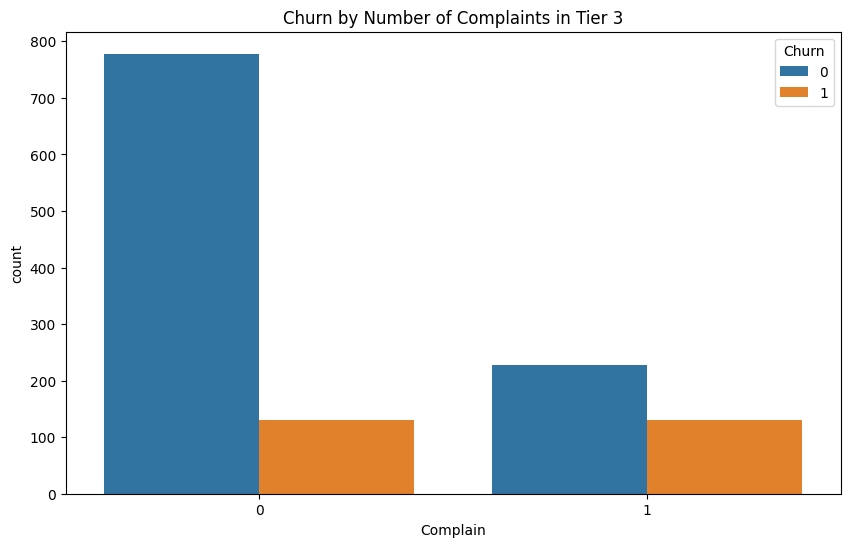

In [20]:
# Churn by Number of Complaints
plt.figure(figsize=(10, 6))
sns.countplot(x='Complain', hue='Churn', data=tier3_data)
plt.title('Churn by Number of Complaints in Tier 3')
plt.show()

### Churn by Number of Complaints
- **Observation**: Customers with complaints have a higher churn rate.
- **Implication**: Efficiently addressing and resolving complaints could help retain these customers.

## Recommendations

1. **Enhance Customer Experience**:
   - Focus on improving satisfaction, especially for mobile users.
   - Consider app improvements and personalized support.

2. **Complaint Resolution**:
   - Implement a robust system to quickly address and resolve customer complaints.

3. **Targeted Engagement**:
   - Use insights to create targeted campaigns for customers at risk of churn, offering incentives or personalized support.

These strategies can help reduce churn rates, particularly in Tier 3 areas.

In [21]:
# Calculate churn rate for each combination of gender and marital status
churn_by_demo = df_cleaned.groupby(['Gender', 'MaritalStatus'])['Churn'].value_counts(normalize=True).unstack() * 100
churn_by_demo.columns = ['Not Churned', 'Churned']

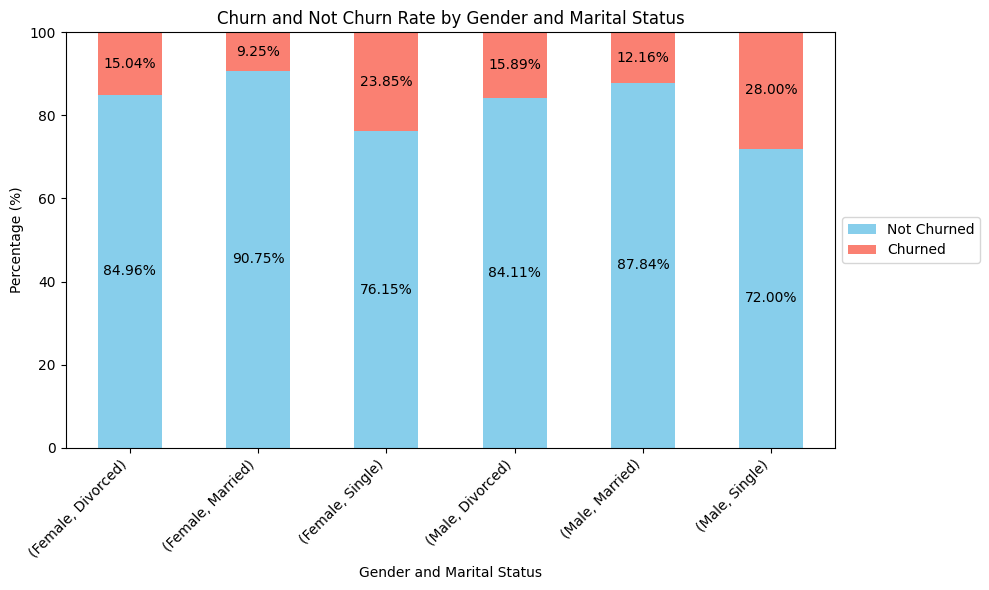

In [22]:
# Plot the churn and not churn rate by gender and marital status
ax = churn_by_demo.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(10, 6))
plt.title('Churn and Not Churn Rate by Gender and Marital Status')
plt.xlabel('Gender and Marital Status')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)

# Add annotations
for index, (not_churned, churned) in enumerate(zip(churn_by_demo['Not Churned'], churn_by_demo['Churned'])):
    plt.text(index, not_churned / 2, f'{not_churned:.2f}%', ha='center', va='center', color='black')
    plt.text(index, not_churned + churned / 2, f'{churned:.2f}%', ha='center', va='center', color='black')

plt.xticks(rotation=45, ha='right')

# Place legend outside of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

## Insights

- **Female, Married**: 
  - Churn rate is the lowest at 9.25%.
  - This group seems to be the most stable.

- **Male, Single**: 
  - Exhibits the highest churn rate at 28%.
  - May require targeted retention strategies.

- **Female, Single**: 
  - Has a relatively high churn rate at 23.85%.
  - Indicates potential issues or dissatisfaction.

- **Divorced Individuals**: 
  - Both genders show moderate churn rates, with females slightly lower than males.

## Recommendations

1. **Targeted Retention Programs**:
   - Focus on single males and females, providing personalized offers or engagement strategies to improve retention.

2. **Customer Feedback**:
   - Conduct surveys or focus groups with high-churn segments to identify specific issues or areas for improvement.

3. **Loyalty Programs**:
   - Develop loyalty incentives specifically aimed at high-churn groups to encourage long-term engagement.

These strategies can help address the specific needs of different demographic groups and reduce overall churn.

In [23]:
# Define tenure bins and labels
bins = [0, 6, 12, 24, 36, 48, 72]
labels = ['0-6 months', '6-12 months', '1-2 years', '2-3 years', '3-4 years', '4-6 years']

In [24]:
# Create tenure bins
df_cleaned['TenureBin'] = pd.cut(df_cleaned['Tenure'], bins=bins, labels=labels, right=False)

# Calculate churn rate for each tenure segment
churn_by_tenure = df_cleaned.groupby('TenureBin')['Churn'].mean() * 100

posx and posy should be finite values
posx and posy should be finite values


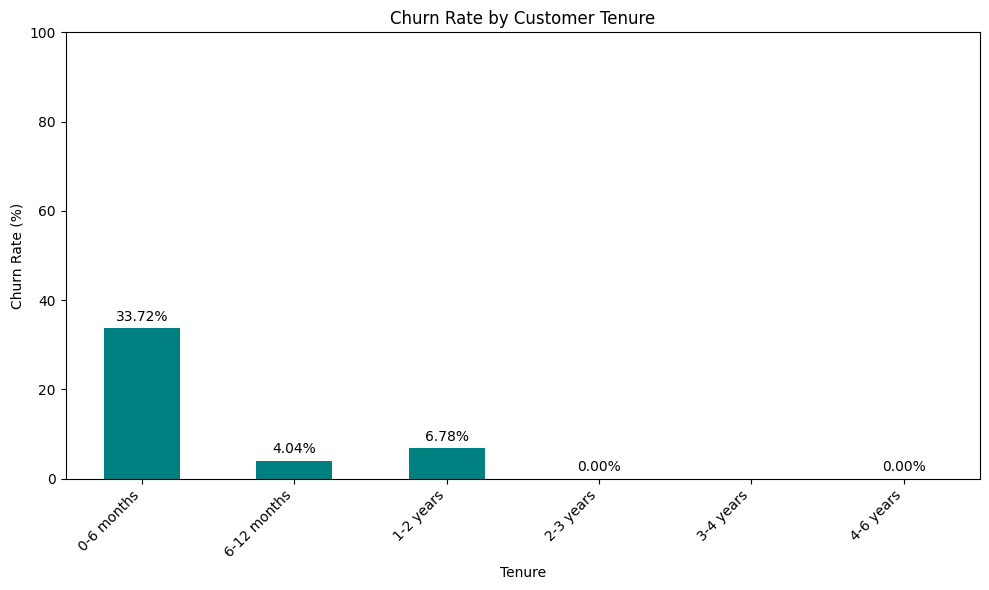

In [25]:
# Plot the churn rate by tenure
plt.figure(figsize=(10, 6))
churn_by_tenure.plot(kind='bar', color='teal')
plt.title('Churn Rate by Customer Tenure')
plt.xlabel('Tenure')
plt.ylabel('Churn Rate (%)')
plt.ylim(0, 100)

# Add annotations
for index, value in enumerate(churn_by_tenure):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Insights

- **0-6 Months**: 
  - Highest churn rate at 33.72%.
  - Indicates that new customers are at the greatest risk of churning.

- **6-12 Months**: 
  - Churn rate drops significantly to 4.04%.
  - Suggests that retention improves after the initial period.

- **1-2 Years**: 
  - Churn rate slightly increases to 6.78%.
  - Indicates some risk of churn as customers approach the end of their second year.

- **2-6 Years**: 
  - No churn observed.
  - Long-term customers are highly stable.

## Recommendations

1. **Onboarding and Early Engagement**:
   - Enhance the onboarding process to better integrate new customers.
   - Implement early engagement strategies to build loyalty within the first 6 months.

2. **Retention Programs**:
   - Develop targeted retention programs for customers in their first year to encourage continued engagement.

3. **Monitor and Support**:
   - Closely monitor customers approaching the end of their first and second years.
   - Provide additional support or incentives to encourage renewal and long-term commitment.

These strategies aim to reduce churn by focusing on the critical early stages of the customer lifecycle.

In [26]:
# Calculate churn and non-churn rate for each login device
churn_by_device = df_cleaned.groupby('PreferredLoginDevice')['Churn'].value_counts(normalize=True).unstack() * 100
churn_by_device.columns = ['Not Churned', 'Churned']

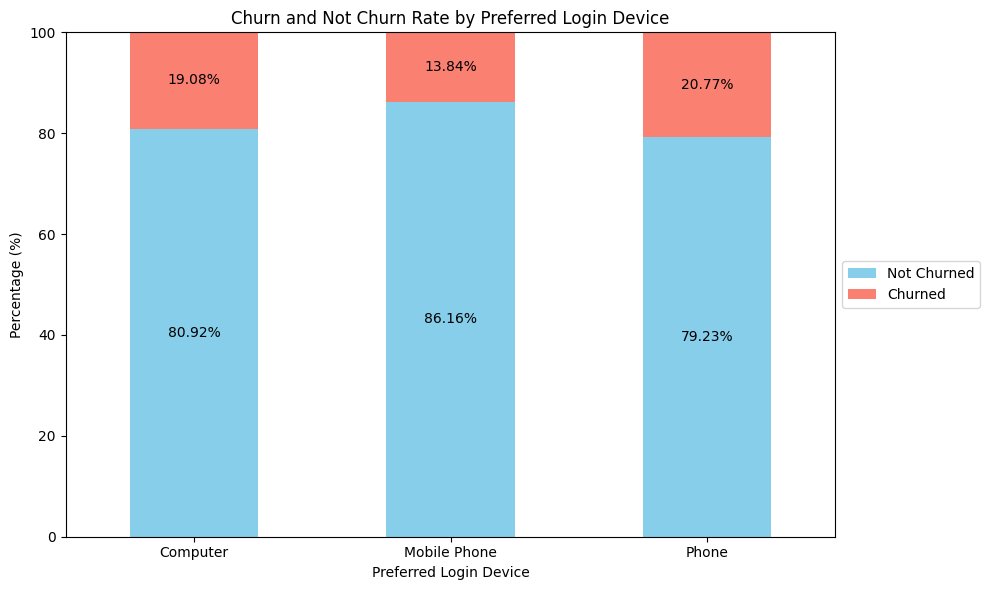

In [27]:
# Plot the churn and not churn rate by preferred login device
ax = churn_by_device.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(10, 6))
plt.title('Churn and Not Churn Rate by Preferred Login Device')
plt.xlabel('Preferred Login Device')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)

# Add annotations
for index, (not_churned, churned) in enumerate(zip(churn_by_device['Not Churned'], churn_by_device['Churned'])):
    plt.text(index, not_churned / 2, f'{not_churned:.2f}%', ha='center', va='center', color='black')
    plt.text(index, not_churned + churned / 2, f'{churned:.2f}%', ha='center', va='center', color='black')

plt.xticks(rotation=0)

# Place legend outside of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

## Insights

- **Computer**: 
  - Churn rate is 19.08%.
  - Indicates moderate risk among users who prefer computers.

- **Mobile Phone**: 
  - Lowest churn rate at 13.84%.
  - Suggests higher satisfaction or engagement among mobile users.

- **Phone**: 
  - Highest churn rate at 20.77%.
  - Indicates potential issues or dissatisfaction among these users.

## Recommendations

1. **Enhance User Experience**:
   - Focus on improving the user experience for phone users to reduce churn.
   - Investigate potential issues or barriers faced by these users.

2. **Leverage Mobile Engagement**:
   - Continue to leverage the mobile platform's strengths by offering exclusive features or deals to mobile users.

3. **Cross-Platform Consistency**:
   - Ensure a consistent and seamless experience across all devices to improve satisfaction and retention.

These strategies can help address device-specific challenges and improve overall customer retention.

In [28]:
# Define usage bins and labels
bins = [0, 5, 10, 20, 30]
labels = ['0-5 hours', '5-10 hours', '10-20 hours', '20-30 hours']

In [29]:
# Create usage bins
df_cleaned['UsageBin'] = pd.cut(df_cleaned['HourSpendOnApp'], bins=bins, labels=labels, right=False)

# Calculate churn and non-churn rate for each usage segment
churn_by_usage = df_cleaned.groupby('UsageBin')['Churn'].value_counts(normalize=True).unstack() * 100
churn_by_usage.columns = ['Not Churned', 'Churned']

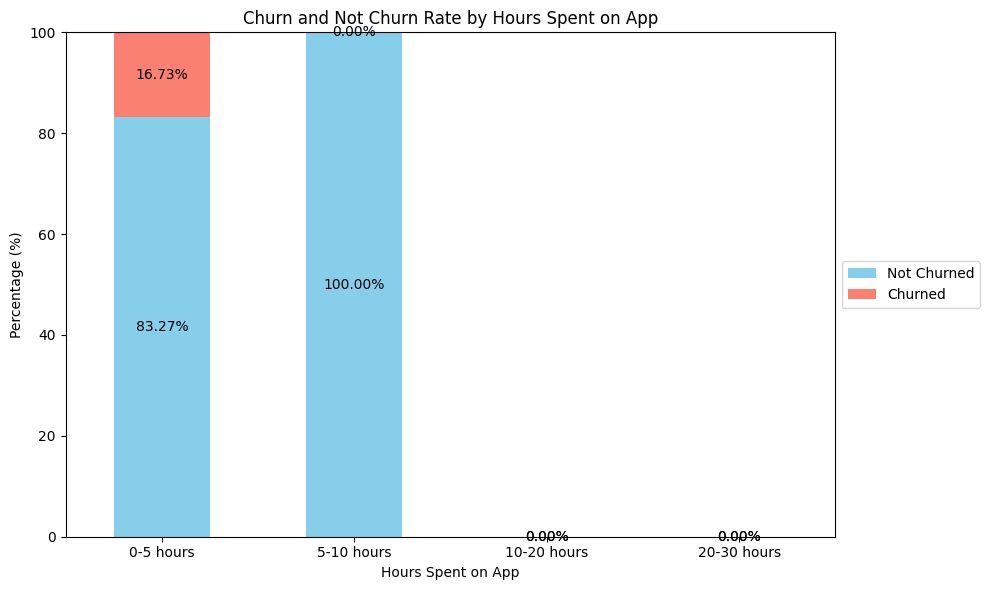

In [30]:
# Plot the churn and not churn rate by app usage
ax = churn_by_usage.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(10, 6))
plt.title('Churn and Not Churn Rate by Hours Spent on App')
plt.xlabel('Hours Spent on App')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)

# Add annotations
for index, (not_churned, churned) in enumerate(zip(churn_by_usage['Not Churned'], churn_by_usage['Churned'])):
    plt.text(index, not_churned / 2, f'{not_churned:.2f}%', ha='center', va='center', color='black')
    plt.text(index, not_churned + churned / 2, f'{churned:.2f}%', ha='center', va='center', color='black')

plt.xticks(rotation=0)

# Place legend outside of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

## Insights

- **0-5 Hours**: 
  - Churn rate is 16.73%.
  - Indicates that less engagement correlates with higher churn.

- **5-10 Hours**: 
  - No churn observed (100% retention).
  - Suggests that more time spent on the app improves retention.

- **10-30 Hours**: 
  - No churn observed.
  - High engagement levels are associated with stable customer retention.

## Recommendations

1. **Increase Engagement**:
   - Develop strategies to increase app usage among low-engagement users.
   - Introduce features or content that encourage more frequent app visits.

2. **Personalized Content**:
   - Use data analytics to provide personalized recommendations and content to users, increasing their time spent on the app.

3. **User Education**:
   - Educate users on app features and benefits to encourage deeper engagement.

These strategies aim to enhance user interaction with the app, thereby reducing churn rates.

In [31]:
# Calculate churn and non-churn rate for each device count
churn_by_devices = df_cleaned.groupby('NumberOfDeviceRegistered')['Churn'].value_counts(normalize=True).unstack() * 100
churn_by_devices.columns = ['Not Churned', 'Churned']

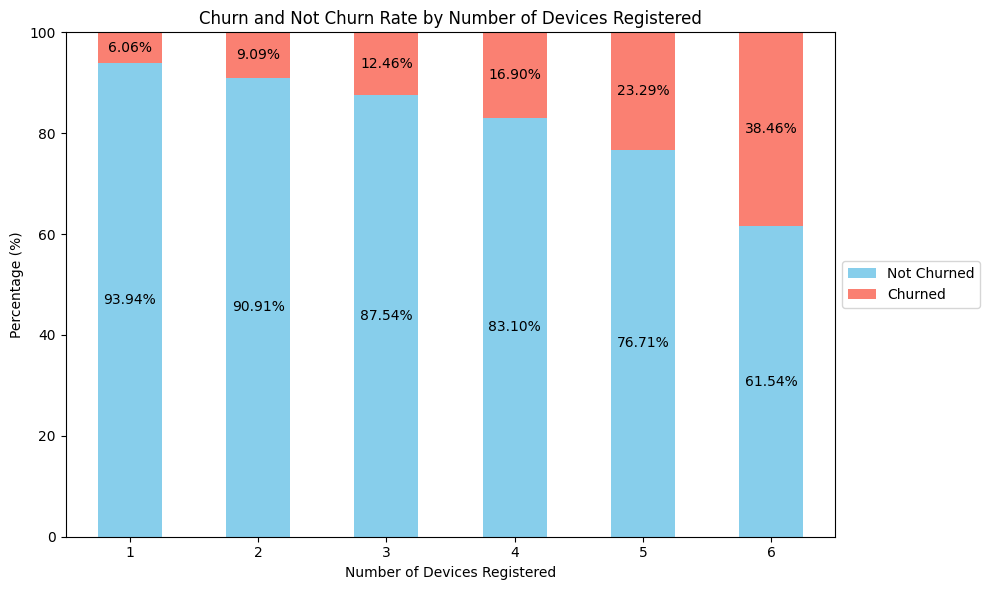

In [32]:
# Plot the churn and not churn rate by number of devices registered
ax = churn_by_devices.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(10, 6))
plt.title('Churn and Not Churn Rate by Number of Devices Registered')
plt.xlabel('Number of Devices Registered')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)

# Add annotations
for index, (not_churned, churned) in enumerate(zip(churn_by_devices['Not Churned'], churn_by_devices['Churned'])):
    plt.text(index, not_churned / 2, f'{not_churned:.2f}%', ha='center', va='center', color='black')
    plt.text(index, not_churned + churned / 2, f'{churned:.2f}%', ha='center', va='center', color='black')

plt.xticks(rotation=0)

# Place legend outside of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

## Insights

- **1 Device**: 
  - Lowest churn rate at 6.06%.
  - Indicates high retention among users with a single device.

- **2-3 Devices**: 
  - Churn rates increase to 9.09% and 12.46%, respectively.
  - Suggests moderate risk as more devices are registered.

- **4-6 Devices**: 
  - Churn rates rise significantly, peaking at 38.46% for six devices.
  - Indicates potential issues with managing multiple devices.

## Recommendations

1. **Simplify Device Management**:
   - Improve the user interface and experience for managing multiple devices.
   - Provide clear instructions and support for device registration and use.

2. **Monitor Multi-Device Users**:
   - Identify and monitor users with multiple devices for early signs of churn.
   - Offer personalized support or incentives to retain these users.

3. **Feedback Collection**:
   - Collect feedback from users with multiple devices to identify pain points and areas for improvement.

These strategies aim to enhance the experience for users with multiple devices, thereby reducing churn rates.

In [38]:
# Define bins for order count
bins = [0, 2, 5, 8, 11]
labels = ['Low', 'Medium', 'High', 'Very High']
df_cleaned['OrderFrequency'] = pd.cut(df_cleaned['OrderCount'], bins=bins, labels=labels, right=False)

In [39]:
# Calculate churn and non-churn rate for each segment
churn_by_frequency = df_cleaned.groupby('OrderFrequency')['Churn'].value_counts(normalize=True).unstack() * 100
churn_by_frequency.columns = ['Not Churned', 'Churned']

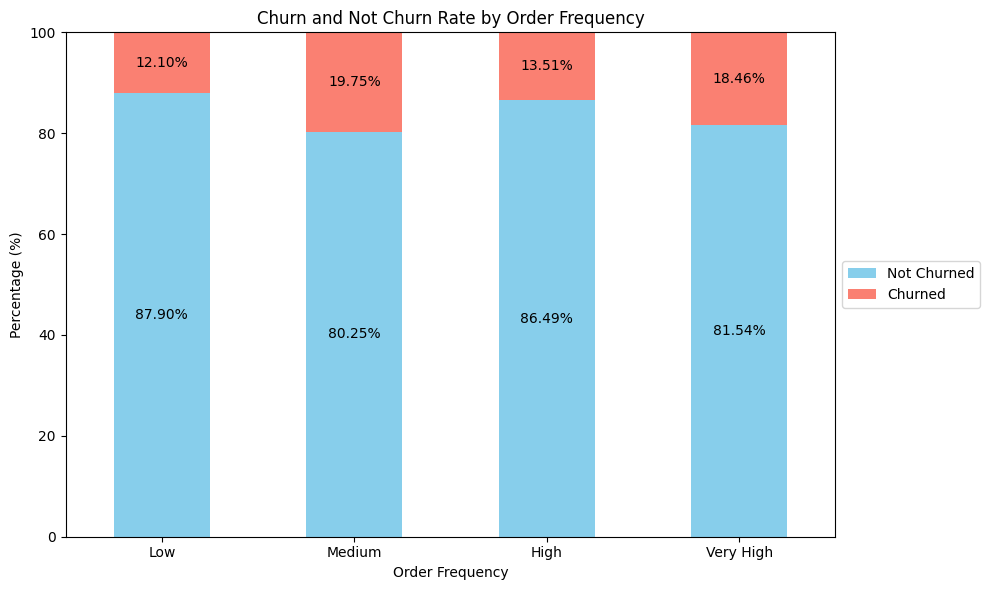

In [40]:
# Plot the churn and not churn rate by order frequency
ax = churn_by_frequency.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(10, 6))
plt.title('Churn and Not Churn Rate by Order Frequency')
plt.xlabel('Order Frequency')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)

# Add annotations
for index, (not_churned, churned) in enumerate(zip(churn_by_frequency['Not Churned'], churn_by_frequency['Churned'])):
    plt.text(index, not_churned / 2, f'{not_churned:.2f}%', ha='center', va='center', color='black')
    plt.text(index, not_churned + churned / 2, f'{churned:.2f}%', ha='center', va='center', color='black')

plt.xticks(rotation=0)

# Place legend outside of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

## Insights

- **Low Frequency**: 
  - Churn rate is 12.10%.
  - Indicates relatively stable retention among infrequent orderers.

- **Medium Frequency**: 
  - Churn rate increases to 19.75%.
  - Suggests potential dissatisfaction or unmet needs.

- **High Frequency**: 
  - Churn rate is 13.51%.
  - Indicates good retention with frequent engagement.

- **Very High Frequency**: 
  - Churn rate is 18.46%.
  - Suggests possible burnout or service issues with very frequent orders.

## Recommendations

1. **Engagement Strategies**:
   - Develop strategies to engage medium-frequency customers, such as personalized offers or loyalty programs.

2. **Feedback and Improvement**:
   - Collect feedback from very high-frequency customers to understand potential issues.
   - Ensure quality service to prevent burnout or dissatisfaction.

3. **Incentivize Frequency**:
   - Encourage low-frequency customers to order more often through targeted promotions or incentives.

These strategies aim to optimize customer engagement and reduce churn across different order frequencies.

In [41]:
from scipy.stats import pearsonr

# Calculate correlation
correlation, p_value = pearsonr(df_cleaned['SatisfactionScore'], df_cleaned['Churn'])
print(f'Correlation: {correlation:.2f}, P-value: {p_value:.4f}')

Correlation: 0.10, P-value: 0.0000


In [42]:
# Segment customers by complains
df_cleaned['RaisedComplain'] = df_cleaned['Complain'] > 0

In [43]:
# Calculate churn and non-churn rate for each segment
churn_by_complaints = df_cleaned.groupby('RaisedComplain')['Churn'].value_counts(normalize=True).unstack() * 100
churn_by_complaints.columns = ['Not Churned', 'Churned']
churn_by_complaints.index = ['No Complaints', 'Complaints']

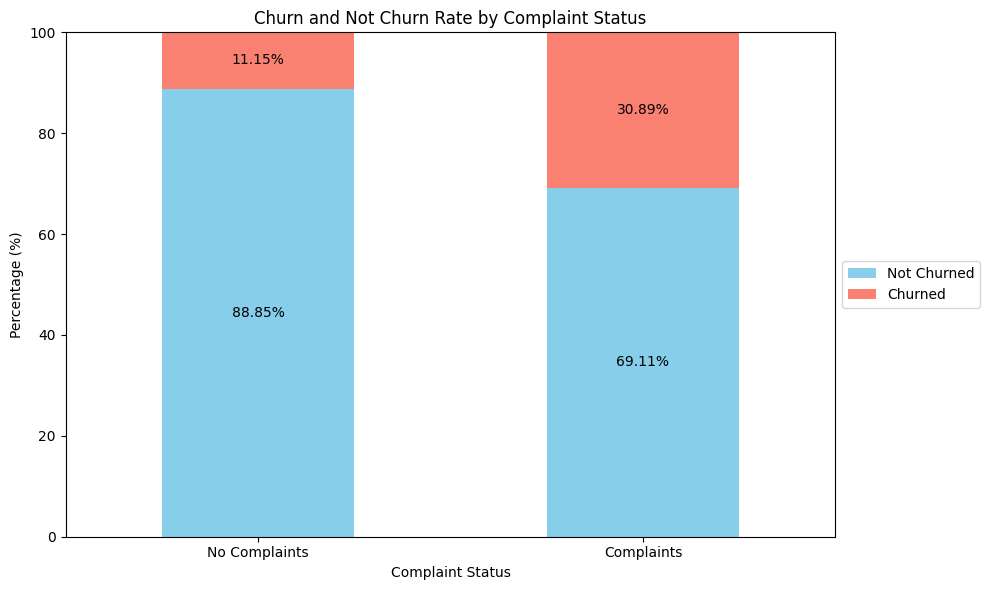

In [44]:
# Plot the churn and not churn rate by complaint status
ax = churn_by_complaints.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(10, 6))
plt.title('Churn and Not Churn Rate by Complaint Status')
plt.xlabel('Complaint Status')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)

# Add annotations
for index, (not_churned, churned) in enumerate(zip(churn_by_complaints['Not Churned'], churn_by_complaints['Churned'])):
    plt.text(index, not_churned / 2, f'{not_churned:.2f}%', ha='center', va='center', color='black')
    plt.text(index, not_churned + churned / 2, f'{churned:.2f}%', ha='center', va='center', color='black')

plt.xticks(rotation=0)

# Place legend outside of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

## Insights

- **No Complaints**: 
  - Churn rate is 11.15%.
  - Indicates high retention among customers without complaints.

- **Complaints**: 
  - Churn rate increases significantly to 30.89%.
  - Highlights the impact of unresolved issues on customer retention.

## Recommendations

1. **Efficient Complaint Resolution**:
   - Implement a robust system to quickly address and resolve customer complaints.
   - Ensure that customers feel heard and valued during the resolution process.

2. **Proactive Communication**:
   - Reach out to customers with complaints to offer solutions and prevent churn.
   - Use feedback to improve products and services.

3. **Customer Support Training**:
   - Train support teams to handle complaints effectively and empathetically.
   - Focus on turning negative experiences into positive outcomes.

These strategies aim to reduce churn by improving the handling and resolution of customer complaints.

In [51]:
# Define bins for distance
bins = [0, 10, 30, 50]
labels = ['Short', 'Medium', 'Long']
df_cleaned['DistanceCategory'] = pd.cut(df_cleaned['WarehouseToHome'], bins=bins, labels=labels, right=False)

In [52]:
# Calculate churn and non-churn rate for each segment
churn_by_distance = df_cleaned.groupby('DistanceCategory')['Churn'].value_counts(normalize=True).unstack() * 100
churn_by_distance.columns = ['Not Churned', 'Churned']

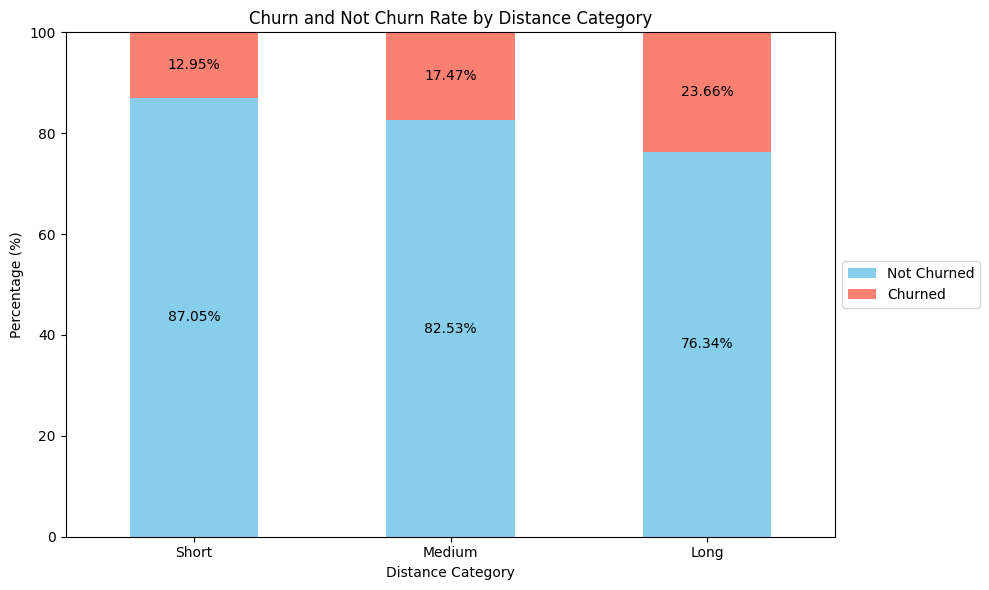

In [53]:
# Plot the churn and not churn rate by distance category
ax = churn_by_distance.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(10, 6))
plt.title('Churn and Not Churn Rate by Distance Category')
plt.xlabel('Distance Category')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)

# Add annotations
for index, (not_churned, churned) in enumerate(zip(churn_by_distance['Not Churned'], churn_by_distance['Churned'])):
    plt.text(index, not_churned / 2, f'{not_churned:.2f}%', ha='center', va='center', color='black')
    plt.text(index, not_churned + churned / 2, f'{churned:.2f}%', ha='center', va='center', color='black')

plt.xticks(rotation=0)

# Place legend outside of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

## Insights

- **Short Distance**: 
  - Churn rate is 12.95%.
  - Indicates higher retention for customers with short distances.

- **Medium Distance**: 
  - Churn rate increases to 17.47%.
  - Suggests some challenges or dissatisfaction as distance increases.

- **Long Distance**: 
  - Highest churn rate at 23.66%.
  - Highlights significant challenges for long-distance customers.

## Recommendations

1. **Improve Delivery Experience**:
   - Focus on optimizing delivery times and reliability for medium and long distances.
   - Consider partnerships with local logistics providers to enhance service.

2. **Customer Communication**:
   - Keep customers informed about delivery status and potential delays.
   - Offer proactive solutions or compensations for delays.

3. **Feedback Loop**:
   - Gather feedback specifically from long-distance customers to identify pain points.
   - Use insights to improve service and reduce churn.

These strategies aim to enhance the customer experience across different distance categories and reduce churn rates.

### Predictive Modeling

In [54]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import time

In [55]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3774 entries, 0 to 5629
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   CustomerID                   3774 non-null   int64   
 1   Churn                        3774 non-null   int64   
 2   Tenure                       3774 non-null   float64 
 3   PreferredLoginDevice         3774 non-null   object  
 4   CityTier                     3774 non-null   int64   
 5   WarehouseToHome              3774 non-null   float64 
 6   PreferredPaymentMode         3774 non-null   object  
 7   Gender                       3774 non-null   object  
 8   HourSpendOnApp               3774 non-null   float64 
 9   NumberOfDeviceRegistered     3774 non-null   int64   
 10  PreferedOrderCat             3774 non-null   object  
 11  SatisfactionScore            3774 non-null   int64   
 12  MaritalStatus                3774 non-null   object  
 13  NumberOf

In [56]:
# Drop unnecessary columns
columns_to_drop = ['CustomerID'] + list(df_cleaned.columns[20:])  # Drop CustomerID and all derived features
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

In [57]:
# Separate features and target
X = df_cleaned.drop('Churn', axis=1)
y = df_cleaned['Churn']

In [58]:
# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [59]:
# Create encoding for categorical variables
label_encoders = {}
for cat_col in categorical_features:
    label_encoders[cat_col] = LabelEncoder()
    X[cat_col] = label_encoders[cat_col].fit_transform(X[cat_col])

In [60]:
# Scale numeric features
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

In [61]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of training set:", X_train.shape)
print("Shape of testing set:", X_test.shape)
print("\nFeatures included:", list(X.columns))

Shape of training set: (3019, 18)
Shape of testing set: (755, 18)

Features included: ['Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


In [62]:
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

# Dictionary to store results
results = {}

In [63]:
# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    start_time = time.time()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    training_time = time.time() - start_time
    
    # Store results
    results[name] = {
        'accuracy': accuracy,
        'training_time': training_time,
        'model': model,
        'predictions': y_pred
    }
    
    # Print results
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Training Time: {training_time:.2f} seconds")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


Training Random Forest...

Random Forest Results:
Accuracy: 0.9682
Training Time: 0.30 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       648
           1       0.95      0.82      0.88       107

    accuracy                           0.97       755
   macro avg       0.96      0.91      0.93       755
weighted avg       0.97      0.97      0.97       755


Confusion Matrix:
[[643   5]
 [ 19  88]]

Training XGBoost...

XGBoost Results:
Accuracy: 0.9907
Training Time: 0.13 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       648
           1       0.97      0.96      0.97       107

    accuracy                           0.99       755
   macro avg       0.98      0.98      0.98       755
weighted avg       0.99      0.99      0.99       755


Confusion Matrix:
[[645   3]
 [  4 103]]

Training Logistic Regression...



# Model Performance Comparison

## Random Forest

- **Accuracy**: 0.9682
- **Training Time**: 0.30 seconds

### Classification Report
- **Class 0**: 
  - Precision: 0.97
  - Recall: 0.99
  - F1-Score: 0.98
- **Class 1**: 
  - Precision: 0.95
  - Recall: 0.82
  - F1-Score: 0.88

### Confusion Matrix
- True Positives: 643
- False Positives: 5
- False Negatives: 19
- True Negatives: 88

## XGBoost

- **Accuracy**: 0.9907
- **Training Time**: 0.13 seconds

### Classification Report
- **Class 0**: 
  - Precision: 0.99
  - Recall: 1.00
  - F1-Score: 0.99
- **Class 1**: 
  - Precision: 0.97
  - Recall: 0.96
  - F1-Score: 0.97

### Confusion Matrix
- True Positives: 645
- False Positives: 3
- False Negatives: 4
- True Negatives: 103

## Logistic Regression

- **Accuracy**: 0.9020
- **Training Time**: 0.03 seconds

### Classification Report
- **Class 0**: 
  - Precision: 0.92
  - Recall: 0.97
  - F1-Score: 0.94
- **Class 1**: 
  - Precision: 0.75
  - Recall: 0.47
  - F1-Score: 0.57

### Confusion Matrix
- True Positives: 631
- False Positives: 17
- False Negatives: 57
- True Negatives: 50

## Summary

- **XGBoost** shows the highest accuracy and performs best overall, with high precision and recall for both classes.
- **Random Forest** also performs well, with slightly lower accuracy and recall for class 1.
- **Logistic Regression** has the lowest accuracy and struggles with class 1, indicating potential issues with class imbalance or feature representation.


In [64]:
# Find best performing model
best_model = max(results.items(), key=lambda x: x[1]['accuracy'])
print(f"\nBest performing model: {best_model[0]} with accuracy: {best_model[1]['accuracy']:.4f}")


Best performing model: XGBoost with accuracy: 0.9907


In [65]:
# Feature importance for Random Forest and XGBoost
def plot_feature_importance(model, model_name):
    if model_name in ['Random Forest', 'XGBoost']:
        importances = model.feature_importances_
        feature_importance = pd.DataFrame({
            'feature': X_train.columns,
            'importance': importances
        }).sort_values('importance', ascending=False)
        print(f"\nTop 10 important features for {model_name}:")
        print(feature_importance.head(10))

# Print feature importance for RF and XGBoost
plot_feature_importance(results['Random Forest']['model'], 'Random Forest')
plot_feature_importance(results['XGBoost']['model'], 'XGBoost')


Top 10 important features for Random Forest:
                        feature  importance
0                        Tenure    0.262389
17               CashbackAmount    0.087881
3               WarehouseToHome    0.078181
11              NumberOfAddress    0.069274
16            DaySinceLastOrder    0.062620
12                     Complain    0.059348
13  OrderAmountHikeFromlastYear    0.054871
9             SatisfactionScore    0.043577
7      NumberOfDeviceRegistered    0.039796
4          PreferredPaymentMode    0.036976

Top 10 important features for XGBoost:
                     feature  importance
0                     Tenure    0.239446
12                  Complain    0.115175
11           NumberOfAddress    0.061034
10             MaritalStatus    0.057014
16         DaySinceLastOrder    0.055766
8           PreferedOrderCat    0.053827
1       PreferredLoginDevice    0.052584
7   NumberOfDeviceRegistered    0.050890
9          SatisfactionScore    0.048665
2                   

In [66]:
from sklearn.metrics import (precision_score, recall_score, f1_score, 
                           roc_auc_score, precision_recall_curve, 
                           average_precision_score, roc_curve)
import matplotlib.pyplot as plt

# Get the XGBoost model
xgb_model = results['XGBoost']['model']
y_pred = results['XGBoost']['predictions']
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Calculate various metrics
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall (Sensitivity)': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred),
    'ROC AUC': roc_auc_score(y_test, y_pred_proba),
    'Average Precision': average_precision_score(y_test, y_pred_proba)
}

In [67]:
# Print all metrics
print("Detailed Metrics for XGBoost:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

Detailed Metrics for XGBoost:
Accuracy: 0.9907
Precision: 0.9717
Recall (Sensitivity): 0.9626
F1 Score: 0.9671
ROC AUC: 0.9952
Average Precision: 0.9759


In [68]:
# Print confusion matrix with labels
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print("                  Predicted Negative  Predicted Positive")
print(f"Actual Negative       {cm[0][0]}                {cm[0][1]}")
print(f"Actual Positive       {cm[1][0]}                {cm[1][1]}")


Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative       645                3
Actual Positive       4                103


In [69]:
# Calculate additional metrics from confusion matrix
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
false_positive_rate = fp / (fp + tn)
negative_predictive_value = tn / (tn + fn)

print("\nAdditional Metrics:")
print(f"Specificity (True Negative Rate): {specificity:.4f}")
print(f"False Positive Rate: {false_positive_rate:.4f}")
print(f"Negative Predictive Value: {negative_predictive_value:.4f}")


Additional Metrics:
Specificity (True Negative Rate): 0.9954
False Positive Rate: 0.0046
Negative Predictive Value: 0.9938


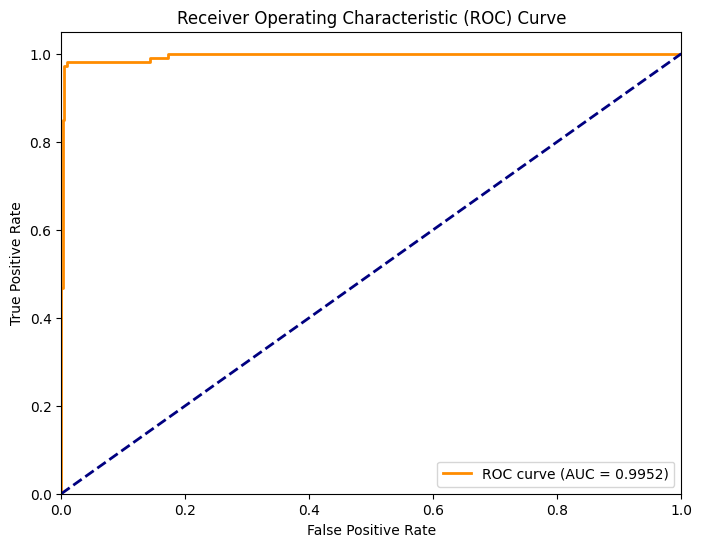

In [70]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {metrics["ROC AUC"]:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# ROC Curve Insights

## High AUC Value (0.9952)
- Indicates excellent model performance in distinguishing between the two classes.
- The model is highly effective at correctly classifying positive and negative instances.

## Curve Shape
- The ROC curve is close to the top-left corner, suggesting a high true positive rate and a low false positive rate across various thresholds.
- This means the model is both sensitive and specific.

## Model Robustness
- The model is robust and reliable for making predictions, consistently performing well across different classification thresholds.

## Conclusion
- The model is well-suited for deployment, with strong predictive capabilities and minimal trade-offs between sensitivity and specificity.

In [71]:
# Save the trained model
import pickle
model_filename = "xgboost_model.pkl"
pickle.dump(model, open(model_filename, "wb"))

In [72]:
# Save the cleaned datasets into dashboard making
df_cleaned.to_csv('cleaned_data.csv', index=False)